Code of Academic Integrity
* I affirm that
* This work is my own original work and is not a borrowed work,

*   This work is my own original work and is not a borrowed work, either from other students or from assignments for other courses.

*   I have not given or received any unauthorized help on this assignment.

*   This submission is free from Plagiarism, Fabrication of facts, Unauthorized assistance, collusion

*   This submission gives proper credit to sources and references, acknowledges the contributions and ideas of others relevant to this academic work.

*   This submission was prepared by me fully adhering to the rules that govern this assignment regarding resource material, electronic aids, copying, collaborating with others, or engaging in any other behavior that subverts the purpose of the assignment and the directions of the teacher.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lab Practice Sheet 7**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Custom Functions

In [ ]:
def ElbowMethod(D, c_num):
  wcss = []
  for i in range(1, c_num):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter = 300, n_init= 10, random_state = 0)
    kmeans.fit(D)
    wcss.append(kmeans.inertia_)
  print("Value of wcss: ", wcss)
  # Plot visualization b/w WCSS and Number of CLusters(K)
  plt.plot(range(1,c_num), wcss)
  # to view the points clearly we add scatter plot in addition to line
  plt.scatter(range(1,c_num), wcss, c = 'black', marker='o')
  plt.xlabel("K - Number of Clusters")
  plt.ylabel("WCSS")
  plt.show()
  return wcss

In [ ]:
def KMeanfunc(D, k):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter= 300, n_init=10,random_state=0)
  kmeans.fit(D)
  y_clusters = kmeans.predict(D)
  print(y_clusters)
  return(kmeans,y_clusters)

In [ ]:
def PerSilScore(D, y_clusters):
  silhouette_avg = silhouette_score(D, y_clusters)
  print(silhouette_avg)

In [ ]:
def ClusVisul(D, y_clusters, k, kmeans, g_title, g_xlabel, g_ylabel, isKmean = True):
  x_array = np.array(D)
  plt.style.use("ggplot")
  plt.figure(figsize=(15,8))
  plt.title(g_title)
  plt.xlabel(g_xlabel)
  plt.ylabel(g_ylabel)
  for i in range(0, k):
    sns.scatterplot( x = x_array[y_clusters == i,0], y = x_array[y_clusters == i,1], label = "Cluster"+str(i+1) , s = 70)
  if(isKmean):
    sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',color='black',label='Centroid',s=70)
  plt.show()


In [ ]:
def Agglomodel(D,k):
  hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage ='ward')
  y_hc = hc.fit_predict(D)
  return(hc,y_hc)

In [ ]:
def dendtree(D, type):
  sns.set_style('white')
  fig = plt.figure(figsize=(20,10))
  dendrogram = sch.dendrogram(sch.linkage(D, method = type))
  plt.show()

## 1.  Generate a data set D with 500 elements such that D contains : 100 random numbers (without any decimal points) in the range of [0-9], 100 random numbers in the range of [10-99], 100 random numbers in the range of [100-999], 100 random numbers in therange of [1000-9999], 100 random numbers in the range of [10000-99999]. D will have 100 single digit numbers, 100 2-digit numbers, 2 100 3-digit numbers, 100 4-digit numbers, 100 5-digit numbers. Use K-means clustering algorithm to cluster the elements of D into k-number of clusters (here k is optimum number of clusters of D obtained through elbow method). Compute the Silhouette Score of your learning model. Visualise the clusters through a scatter plot. Here D contains, 1-digit, 2-digit,3-digit, 4-digit, 5- digit numbers. In all probability, one can expect that D can be clusterd in to 5 clusters such that all the single digit numbers form one cluster, all the 2-digit numbers form a cluster and so on. Based on the output of your experiment, confirm whether your clusters are as described above. If the obtained clusters are not as described above, identify the reasons for that.

### Generating the dataframe D

In [ ]:
x1 = np.random.randint(0,9, size=(100))
x2 = np.random.randint(10,99, size=(100))
x3 = np.random.randint(100,999, size=(100))
x4 = np.random.randint(1000,9999, size=(100))
x5 = np.random.randint(10000,99999, size=(100))

In [ ]:
x = np.concatenate((x1,x2,x3,x4,x5),axis=0)
x

array([    3,     1,     2,     8,     5,     1,     2,     1,     1,
           1,     8,     5,     2,     5,     2,     1,     3,     8,
           7,     2,     0,     5,     8,     0,     0,     8,     3,
           5,     6,     3,     2,     3,     2,     7,     1,     4,
           3,     3,     8,     6,     8,     0,     5,     5,     6,
           7,     0,     2,     0,     8,     2,     7,     8,     2,
           5,     8,     0,     8,     2,     1,     1,     2,     1,
           5,     0,     5,     7,     2,     4,     8,     7,     6,
           4,     3,     3,     6,     7,     5,     8,     7,     0,
           1,     5,     4,     0,     6,     3,     2,     1,     5,
           6,     3,     1,     3,     5,     5,     4,     5,     6,
           2,    37,    61,    63,    79,    78,    95,    20,    70,
          80,    94,    56,    26,    18,    69,    50,    95,    56,
          68,    83,    91,    49,    18,    92,    37,    20,    29,
          73,    91,

In [ ]:
D = pd.DataFrame(data=x, columns=['x'])
D.reset_index(level=0, inplace=True)
D

,index,x
0,0,3
1,1,1
2,2,2
3,3,8
4,4,5
...,...,...
495,495,26471
496,496,66018
497,497,81806
498,498,14908


### Elbow Method

Value of wcss:  [276413248422.63196, 41898301696.14319, 16789671199.086733, 9690027237.736265, 6401949833.951391, 3852543146.1982474, 2775923081.9218993, 2203988205.815534, 1607650087.223562]


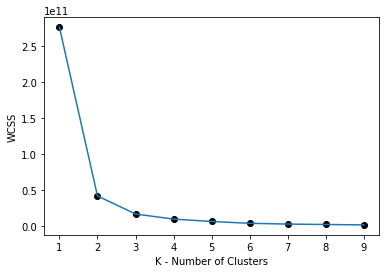

In [ ]:
wcss = ElbowMethod(D, 10)

Optimal Number of Clusters K = 3

In [ ]:
k = 3
kmeans, y_clusters= KMeanfunc(D, k)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 0 2 2
 2 1 2 0 0 0 2 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 2 2
 1 2 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 0 1 2 2 1 1 0 1 0 2 2 1 2 2 0 1 1 2 2
 2 2 1 1 1 2 2 2 0 2 0 0 

In [ ]:
PerSilScore(D, y_clusters)

0.8492903334551386


In [ ]:
kmeans.cluster_centers_

array([[  206.99757282,  1931.53883495],
       [  448.55263158, 80538.78947368],
       [  448.44      , 40066.08      ]])

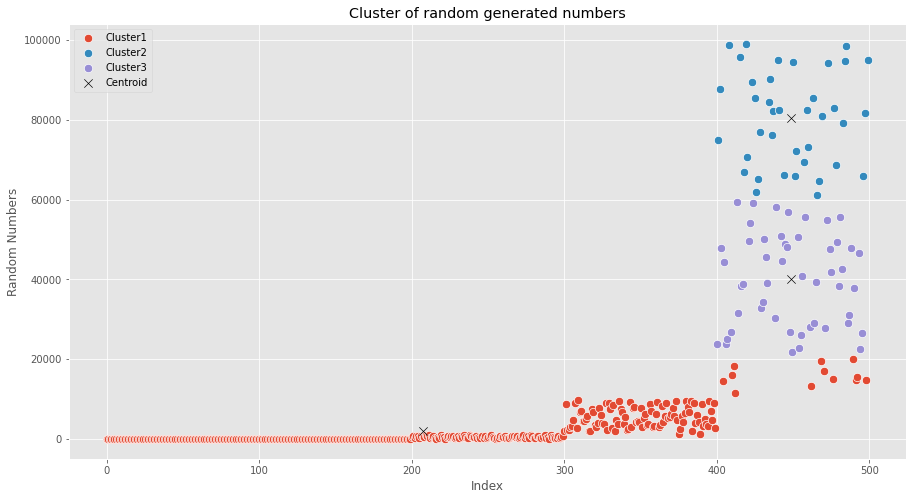

In [ ]:
ClusVisul(D, y_clusters, k, kmeans, 'Cluster of random generated numbers', 'Index', 'Random Numbers')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 3 2 4 2 4
 4 3 4 4 4 0 1 4 3 2 2 1 3 1 2 2 3 1 3 1 1 1 4 4 2 2 2 3 3 1 3 4 1 3 3 2 2
 1 2 2 1 4 4 3 1 1 2 4 4 2 1 2 3 1 4 4 3 4 2 1 1 4 3 4 4 2 3 2 2 4 3 1 2 2
 2 2 3 3 3 4 4 2 4 2 4 4 

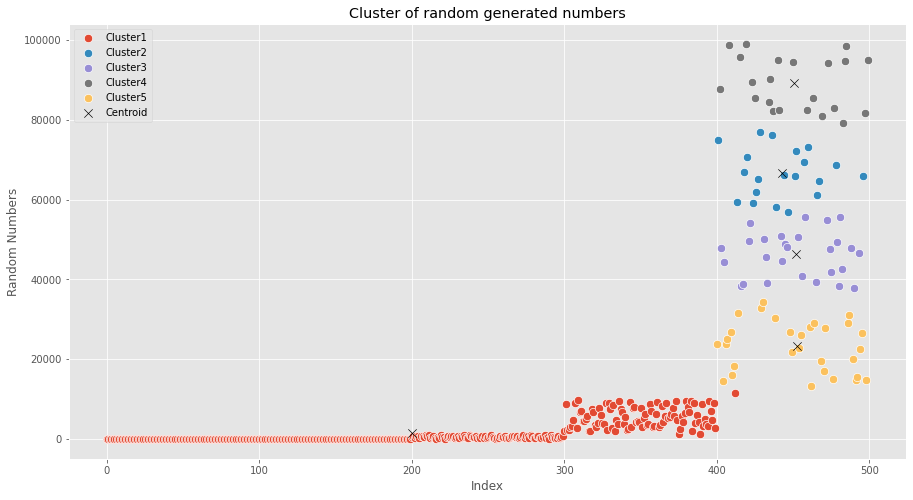

In [ ]:
# How the clustering would have been if k would have been equal to 5 such as we predicted.
k = 5
kmeans, y_clusters= KMeanfunc(D, k)
ClusVisul(D, y_clusters, k, kmeans, 'Cluster of random generated numbers', 'Index', 'Random Numbers')

### Inference

The value of k we got in from elbow method was 3. which was contrarary to what we predicted which was supposed to be 5. The reason for this anomaly might be due to the fact that the diffference in 1,2,3 and 4 digit number are not as large when compared to the 5 digit numbers. Making the algorithm to group together all the 1,2,3 and 4 digit number as one cluster and divided 5 digit number into multiple clusters. We can also observe that when we tried to check the clustering when the value of k is given as 5. Even then the 1, 2, 3, and majority of 4 digit numbers are counted in one category.

##2. Generate a dataset D with 100 three letter english words, with only lowercase letters. Assign a unique number for each of the words, called as ‘weight of a word (denoted as W(w)) as follows: Let the index value of a, denoted as I(a) is 1, index value of b, denoted as I(b) is 2,..., I(y) = 25, I(z) = 26. W(x1x2x3) = I(x1) + I(x2) + I(x3) where x1 is the first letter of the word, x2 is the second letter of the word, x3 is the second letter of the word. For eg., W(and)=1+14+4=19. Construct a new data set D’ which contains the weights of all the words of D. Please generate the dataset D with the three letter words whose weights are different. Cluster D’ using K-means clustering model. Visualise the clusters and compute the Silhouette Score. Clusters of D’ will have weights of the words. Replace each weight in each clusters, with the respective word. Output the clusters of D. Observe the clusters of D and record your inferences based on the clustering.

### Function W(x1x2x3)

In [ ]:
def weightGen(s):
  w = 0
  for x in range(0, len(s)):
    w = w+ ord(s[x]) - 96
  return(w)

In [ ]:
import string
def rand3gen():
  return(''.join(random.choice(string.ascii_lowercase) for _ in range(3)))

In [ ]:
rand3gen()

'xqp'

In [ ]:
char3arr = np.array([rand3gen() for i in range(100)])
char3arr

array(['jmg', 'kna', 'yqy', 'doa', 'xah', 'fla', 'dut', 'orb', 'mpw',
       'ovd', 'ayv', 'shl', 'jrs', 'emt', 'dld', 'smc', 'hww', 'zuj',
       'apq', 'wat', 'bmx', 'pdh', 'fck', 'nrn', 'euz', 'wuu', 'qtq',
       'teq', 'zhm', 'hdi', 'bfi', 'adw', 'hhk', 'cit', 'ncc', 'lqq',
       'mnh', 'zkm', 'bcr', 'hmm', 'iqa', 'njc', 'ztb', 'akb', 'bgh',
       'awy', 'sbx', 'svx', 'jqg', 'zti', 'zwr', 'csq', 'lud', 'zao',
       'xvh', 'bbn', 'qyl', 'vot', 'zfs', 'rza', 'znw', 'cnb', 'ptv',
       'jwr', 'hyu', 'las', 'drp', 'vrs', 'bpu', 'jeq', 'rzw', 'wsf',
       'qyf', 'zon', 'chb', 'rbc', 'kuh', 'lym', 'cem', 'qld', 'ovz',
       'ouf', 'ept', 'zjv', 'xtc', 'oiy', 'vxe', 'owb', 'kqd', 'eif',
       'gux', 'kdp', 'pad', 'naf', 'fen', 'jpl', 'clx', 'xcs', 'fxp',
       'wnv'], dtype='<U3')

In [ ]:
char_D = pd.DataFrame(data=char3arr, columns=['x'])
char_D.reset_index(level=0, inplace=True)
char_D

,index,x
0,0,jmg
1,1,kna
2,2,yqy
3,3,doa
4,4,xah
...,...,...
95,95,jpl
96,96,clx
97,97,xcs
98,98,fxp


In [ ]:
D = char_D.copy()
D['x'] = D['x'].apply(lambda s: weightGen(s))
D

,index,x
0,0,30
1,1,26
2,2,67
3,3,20
4,4,33
...,...,...
95,95,38
96,96,39
97,97,46
98,98,46


Value of wcss:  [102814.39000000003, 39512.669871794875, 28222.826622256584, 20184.51689588302, 16445.349404761902, 13060.410316203404, 11102.862385602017, 9661.966883116882, 8854.512162837162, 7709.9873015873, 7258.41335053835, 6515.5804778554775, 5970.053785103786, 5423.051440226441, 4993.141086691085, 4727.591883116884, 4273.205627705628]


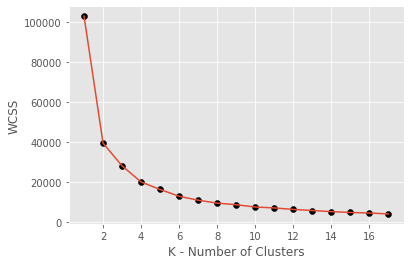

In [ ]:
wcss = ElbowMethod(D, 18)

Taking the value of k as 4

In [ ]:
k = 4
kmeans, y_clusters = KMeanfunc(D, k)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 0 0 0 2 0
 3 0 0 0 0 3 0 0 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 1 3 3 3 3
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
PerSilScore(D, y_clusters)

0.40435244628897976


In [ ]:
kmeans.cluster_centers_

array([[38.58823529, 24.29411765],
       [86.07692308, 37.30769231],
       [14.44827586, 41.48275862],
       [58.46428571, 51.17857143]])

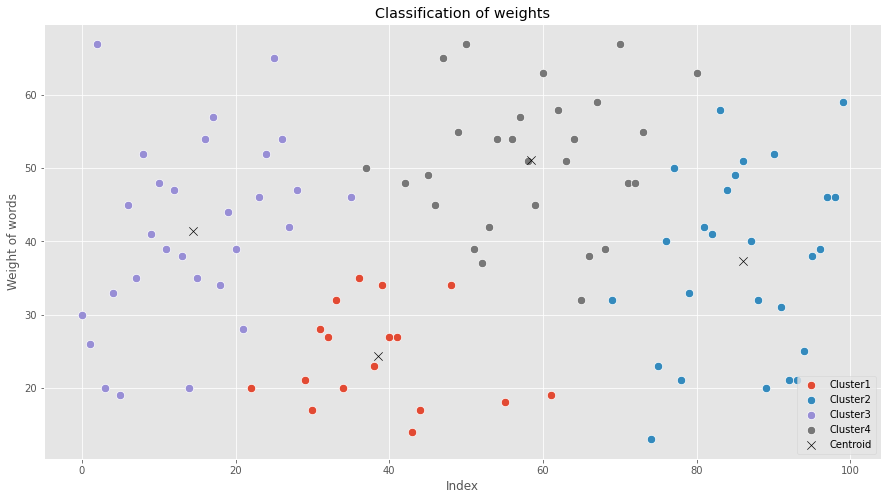

In [ ]:
ClusVisul(D, y_clusters, k, kmeans, 'Classification of weights', 'Index', 'Weight of words')

In [ ]:
y_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
char3arr

array(['jmg', 'kna', 'yqy', 'doa', 'xah', 'fla', 'dut', 'orb', 'mpw',
       'ovd', 'ayv', 'shl', 'jrs', 'emt', 'dld', 'smc', 'hww', 'zuj',
       'apq', 'wat', 'bmx', 'pdh', 'fck', 'nrn', 'euz', 'wuu', 'qtq',
       'teq', 'zhm', 'hdi', 'bfi', 'adw', 'hhk', 'cit', 'ncc', 'lqq',
       'mnh', 'zkm', 'bcr', 'hmm', 'iqa', 'njc', 'ztb', 'akb', 'bgh',
       'awy', 'sbx', 'svx', 'jqg', 'zti', 'zwr', 'csq', 'lud', 'zao',
       'xvh', 'bbn', 'qyl', 'vot', 'zfs', 'rza', 'znw', 'cnb', 'ptv',
       'jwr', 'hyu', 'las', 'drp', 'vrs', 'bpu', 'jeq', 'rzw', 'wsf',
       'qyf', 'zon', 'chb', 'rbc', 'kuh', 'lym', 'cem', 'qld', 'ovz',
       'ouf', 'ept', 'zjv', 'xtc', 'oiy', 'vxe', 'owb', 'kqd', 'eif',
       'gux', 'kdp', 'pad', 'naf', 'fen', 'jpl', 'clx', 'xcs', 'fxp',
       'wnv'], dtype='<U3')

In [ ]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
for i in range(0, len(char3arr)):
   if(y_clusters[i] == 0):
     cluster1.append(char3arr[i])
   elif(y_clusters[i] == 1):
     cluster2.append(char3arr[i])
   elif(y_clusters[i] == 2):
     cluster3.append(char3arr[i])
   elif(y_clusters[i] == 3):
     cluster4.append(char3arr[i])

In [ ]:
print('Cluster 1: ',cluster1)
print('Cluster 2: ',cluster2)
print('Cluster 3: ',cluster3)
print('Cluster 4: ',cluster4)

Cluster 1:  ['fck', 'hdi', 'bfi', 'adw', 'hhk', 'cit', 'ncc', 'mnh', 'bcr', 'hmm', 'iqa', 'njc', 'akb', 'bgh', 'jqg', 'bbn', 'cnb']
Cluster 2:  ['jeq', 'chb', 'rbc', 'kuh', 'lym', 'cem', 'qld', 'ouf', 'ept', 'zjv', 'xtc', 'oiy', 'vxe', 'owb', 'kqd', 'eif', 'gux', 'kdp', 'pad', 'naf', 'fen', 'jpl', 'clx', 'xcs', 'fxp', 'wnv']
Cluster 3:  ['jmg', 'kna', 'yqy', 'doa', 'xah', 'fla', 'dut', 'orb', 'mpw', 'ovd', 'ayv', 'shl', 'jrs', 'emt', 'dld', 'smc', 'hww', 'zuj', 'apq', 'wat', 'bmx', 'pdh', 'nrn', 'euz', 'wuu', 'qtq', 'teq', 'zhm', 'lqq']
Cluster 4:  ['zkm', 'ztb', 'awy', 'sbx', 'svx', 'zti', 'zwr', 'csq', 'lud', 'zao', 'xvh', 'qyl', 'vot', 'zfs', 'rza', 'znw', 'ptv', 'jwr', 'hyu', 'las', 'drp', 'vrs', 'bpu', 'rzw', 'wsf', 'qyf', 'zon', 'ovz']


### Inference

We can observe that in our randomly generated 3 word letters the cluster2 have the most amount of words in them followed by cluster 4 then cluster 1 and lastly cluster 3.

## 3.  Consider the Iris dataset. This dataset contains three classes. Remove the ‘class’ column from the Iris dataset and form a new dataset D1. Cluster D1 into three clusters using K-means clustering model. Visualise the clusters and compute the Silhouette score. Observe the clusters of D1 and conclude whether all the elements (of Iris dataset) that belong to the class Setosa belong to one cluster of D1 or not, all the elements that belong to the 3 class Versicolor belong to one cluster of D1 or not and all the elements that belong to Virginica belong to one cluster or not. In other words, you are required to observe the output of your experiment and conclude whether the classes of Iris dataset and the clusters of D1 are getting mapped to each other or not. In case your answer is negative, identify the elements which violates the mapping.


In [ ]:
iris_df = pd.read_csv("/content/drive/MyDrive/Datasets/Iris.csv")

In [ ]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
D1 = iris_df.drop(['Species'], axis = 1, inplace=False)
D1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
D1.drop(['Id'], axis =1, inplace=True)

Value of wcss:  [680.8244000000001, 152.36870647733906, 78.940841426146, 57.317873214285704, 46.56163015873016, 38.930963049671746, 34.19068792479663, 30.06387443273313, 27.842356060606072]


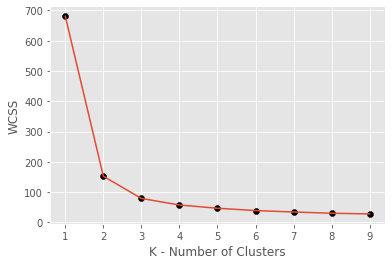

In [ ]:
wcss = ElbowMethod(D1, 10)

In [ ]:
k = 3
kmeans, y_clusters = KMeanfunc(D1, k)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
PerSilScore(D1, y_clusters)

0.5525919445499757


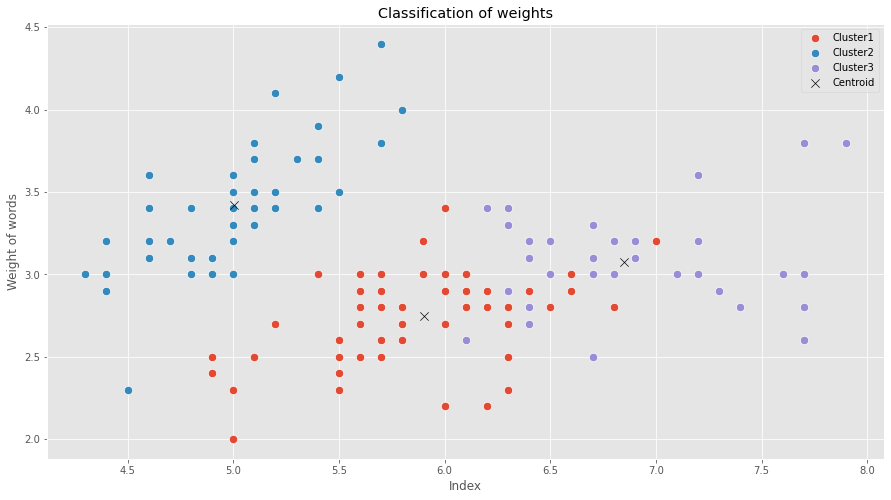

In [ ]:
ClusVisul(D1, y_clusters, k, kmeans, 'Classification of weights', 'Index', 'Weight of words')

In [ ]:
iris_df['Species'][0]

'Iris-setosa'

In [ ]:
match = 0
idnomatch = []
for x in range(0, len(y_clusters)):
  if(y_clusters[x] == 1 and iris_df['Species'][x] == 'Iris-setosa'):
    match = match +1 
  elif(y_clusters[x] == 0 and iris_df['Species'][x] == 'Iris-versicolor'):
    match = match +1 
  elif(y_clusters[x] == 2 and iris_df['Species'][x] == 'Iris-virginica'):
    match = match +1 
  else:
    idnomatch.append(iris_df['Id'][x])

In [ ]:
print("Out of ", len(y_clusters), " the total number which match with the original species are ", match)
print("Percentage error in matching is ", (((len(y_clusters)-match)/len(y_clusters))*100))
print("The id of the species which did not match are: ", idnomatch)

Out of  150  the total number which match with the original species are  134
Percentage error in matching is  10.666666666666668
The id of the species which did not match are:  [53, 78, 102, 107, 114, 115, 120, 122, 124, 127, 128, 134, 139, 143, 147, 150]


### Inference

From the above outcome we can infer that out of the 150 rows our model was able to accurately predict 134 values and had an error percentage of 10.667. The id which were incorrectly predicted are also shown in the output above.

## 4. Download a dataset of your choice. Cluster the dataset by training the following models: K-means clustering and the Agglomerative clustering (cluster into same number of clusters as done with the k-means clustering model). For each of the models, visualise the clusters through a scatter plot, compute the centroid of each clusters and compute the respective Silohuette score . Based on your experiment, which model (either k-means or agglomerative) has learnt well.

In [ ]:
mydf = pd.read_csv("/content/drive/MyDrive/Datasets/abalone.csv")

In [ ]:
mydf.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


We will try to form a cluster based on Height and Total Weight.

In [ ]:
mydf.isnull().sum()

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

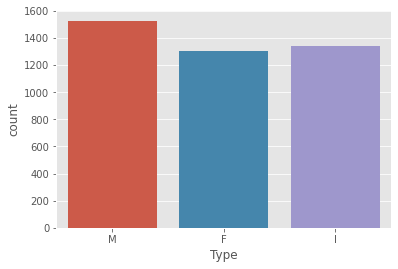

In [ ]:
sns.countplot(x = "Type", data = mydf)

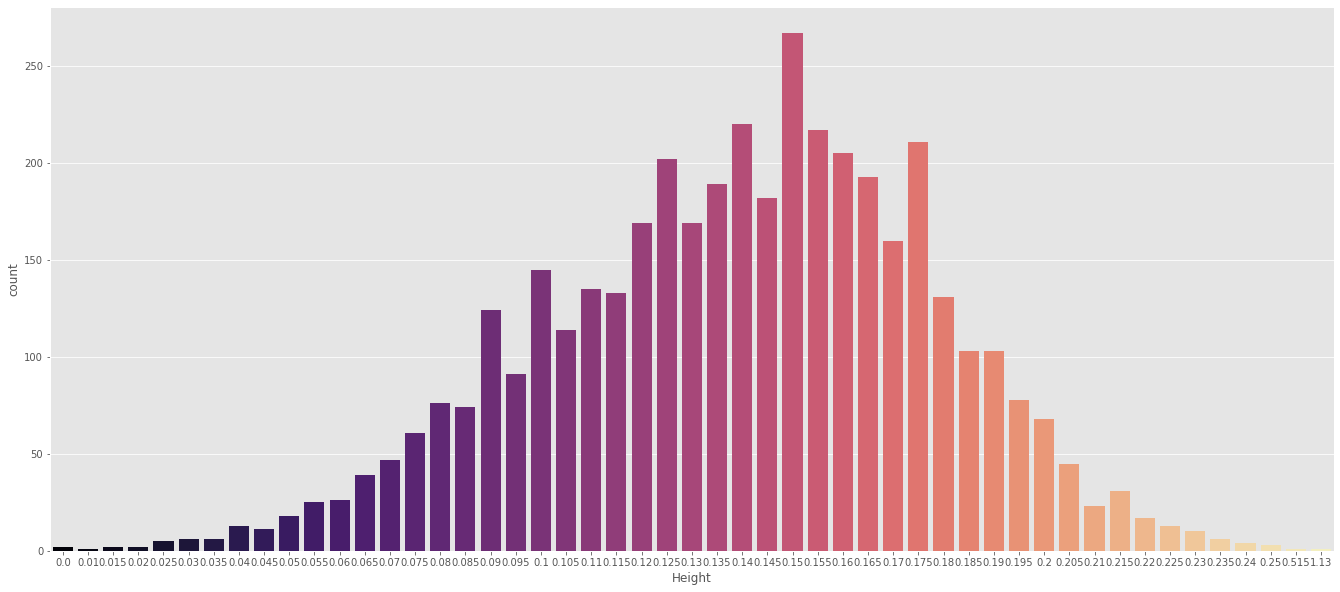

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'Height', data = mydf, palette='magma')

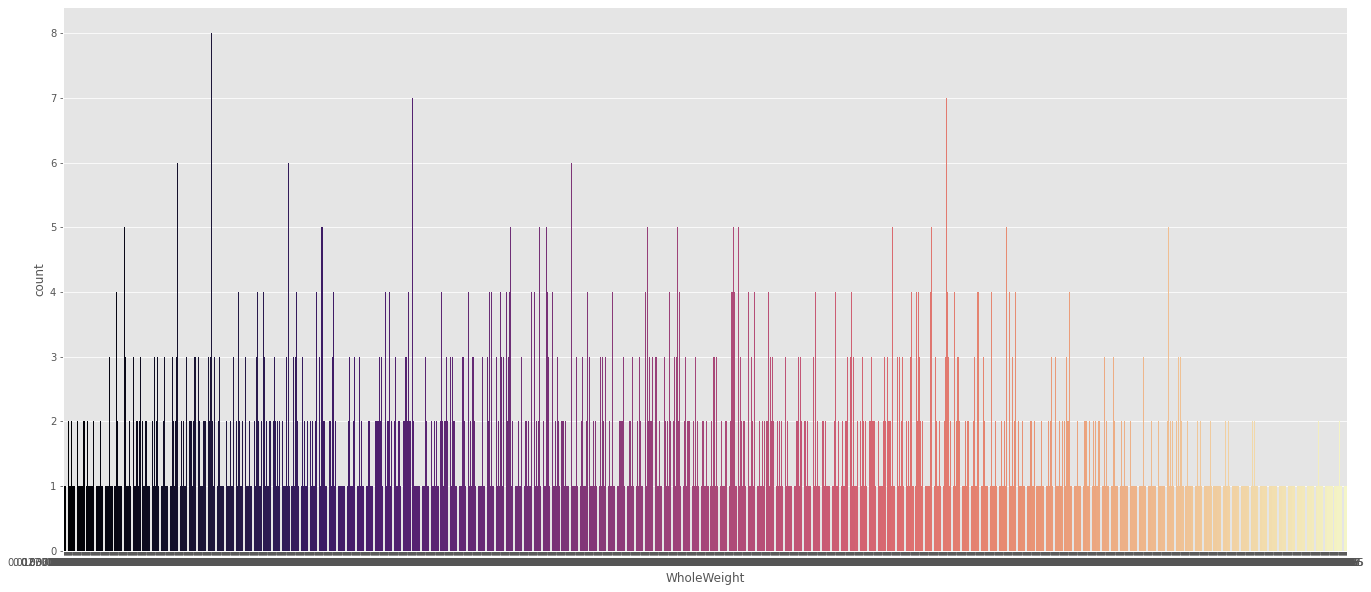

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(x = 'WholeWeight', data = mydf, palette='magma')

In [ ]:
D = mydf.iloc[:, [3,4]]
D

,Height,WholeWeight
0,0.095,0.5140
1,0.090,0.2255
2,0.135,0.6770
3,0.125,0.5160
4,0.080,0.2050
...,...,...
4172,0.165,0.8870
4173,0.135,0.9660
4174,0.205,1.1760
4175,0.150,1.0945


Value of wcss:  [1011.5562044323674, 335.31003342895366, 169.11371470340663, 100.92709899306207, 67.64716656893198, 47.87313089601177, 36.381298602708725, 28.053225440433422, 23.236323102398266]


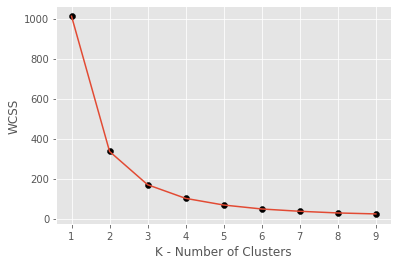

In [ ]:
wcss = ElbowMethod(D, 10)

In [ ]:
k = 3
kmeans, y_clusters = KMeanfunc(D, k)

[1 1 0 ... 0 0 2]


In [ ]:
PerSilScore(D, y_clusters)

0.5564907412844441


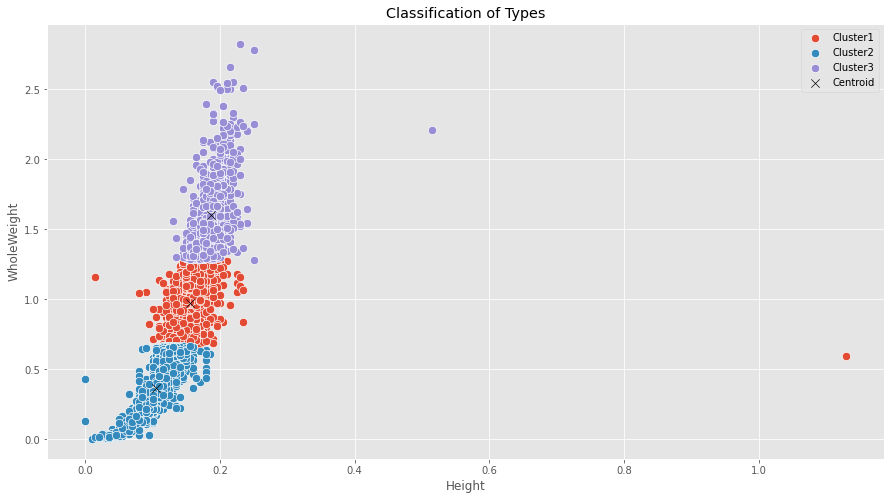

In [ ]:
ClusVisul(D, y_clusters, k, kmeans, 'Classification of Types', 'Height', 'WholeWeight')

Aggolomerative Clustering

In [ ]:
hc,y_hc = Agglomodel(D,k)

In [ ]:
y_hc

array([1, 1, 0, ..., 0, 0, 2])

In [ ]:
PerSilScore(D, y_hc)

0.5149217792890792


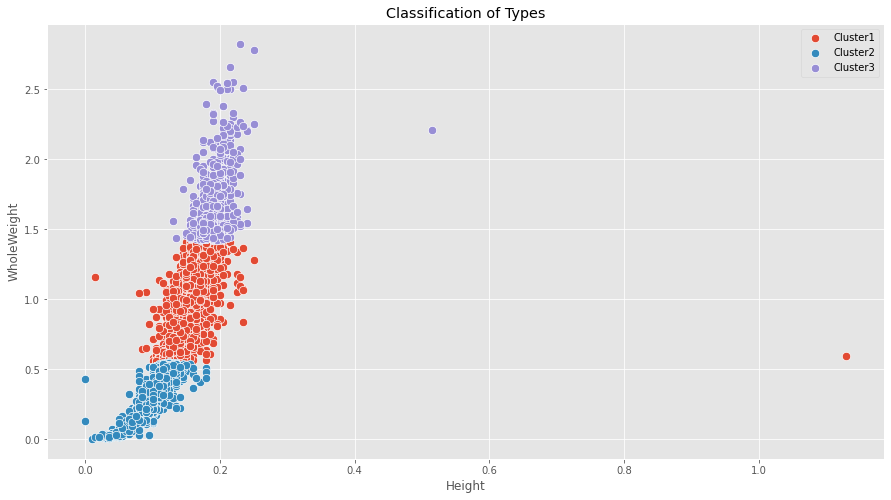

In [ ]:
ClusVisul(D, y_hc, k, hc, 'Classification of Types', 'Height', 'WholeWeight', False)

### Inference

From the above experiment the Silohutte Score of model trained by K-means is higher than model Agglomerative clustering hence, we can colcude that the K-Means clustering learned better.

## 7. Consider a dataset D with a minimum of 500 datapoints without any output column. Conduct three experiments with sk-learn kmeans cluster, by choosing the single link measure, complete link measure and the average link measure (for the distance between the custers). Visualise the clusters in all the three models through a scatter plot, Compare the perfromance of all the three experiment and conclude the best strategy (for the distance between the clusters)to be chosen for the measuring the distance between the clusters with reference to the data set D

In [ ]:
mydf = pd.read_csv("/content/drive/MyDrive/Datasets/insurance.csv")

In [ ]:
mydf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We will try to form a cluster based on Diameter and Rings.

In [ ]:
D = mydf.iloc[:, [2,6]]
D

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


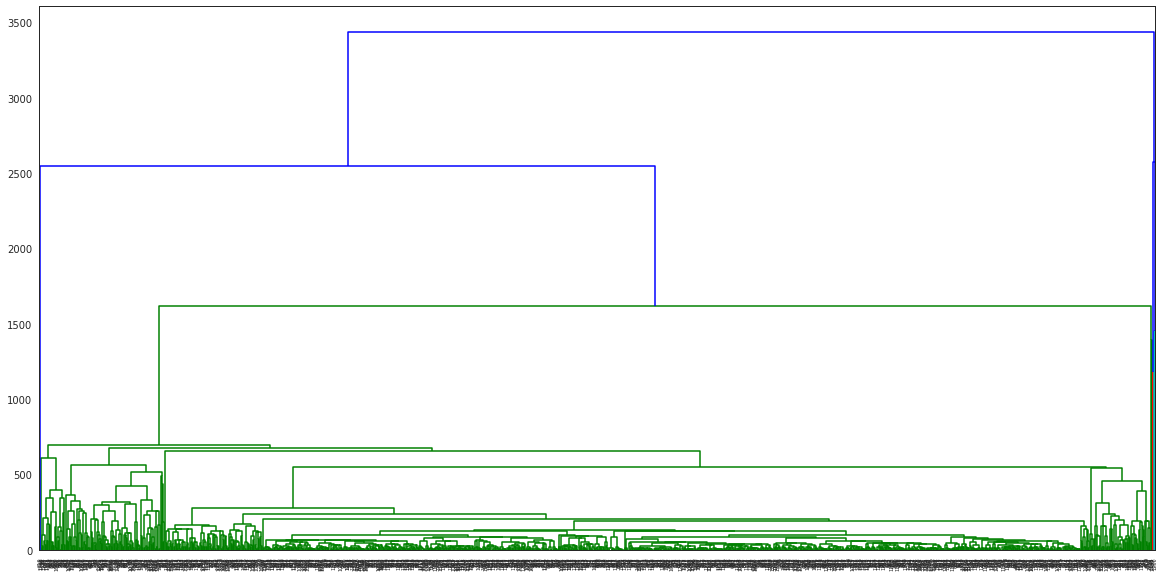

In [ ]:
dendtree(D, 'single')

[3 0 0 ... 0 0 1]
0.6105126830586791


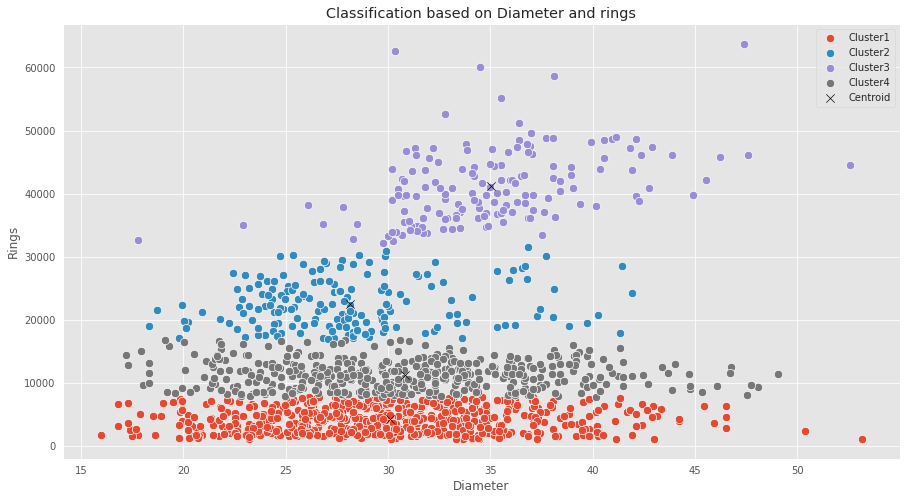

In [ ]:
k = 4
kmeans, y_clusters = KMeanfunc(D, k)
PerSilScore(D, y_clusters)
ClusVisul(D, y_clusters, k, kmeans, 'Classification based on Diameter and rings', 'Diameter', 'Rings')

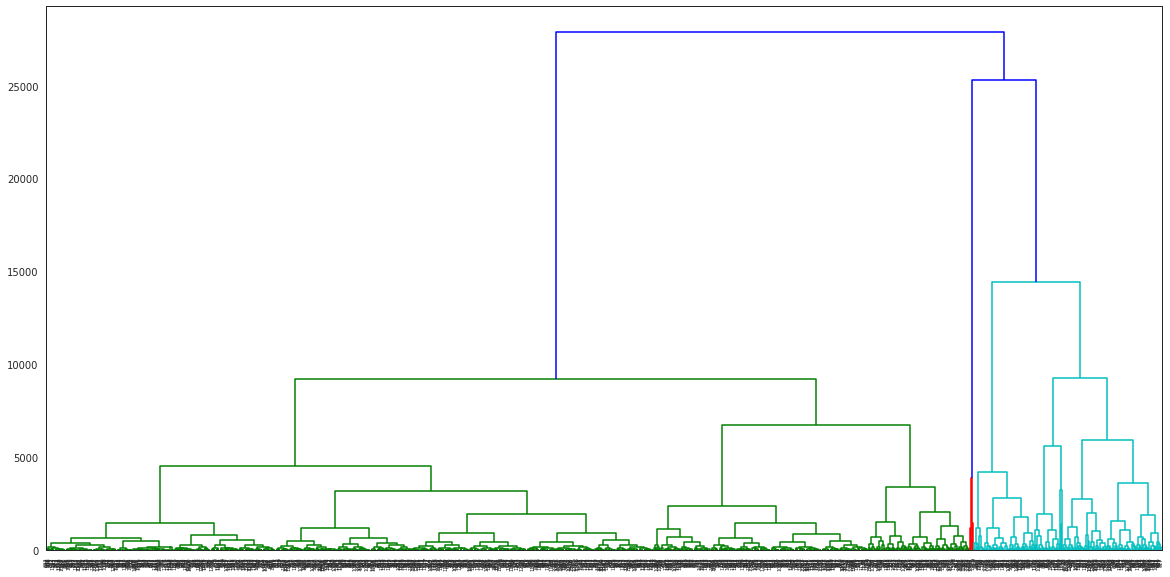

In [ ]:
dendtree(D, 'average')

[1 0 0 ... 0 0 1]
0.6202861872496285


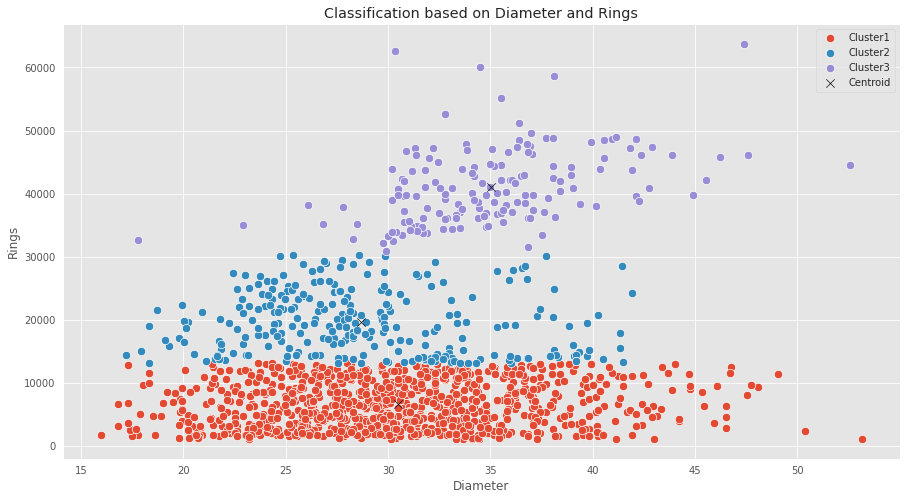

In [ ]:
k = 3
kmeans, y_clusters = KMeanfunc(D, k)
PerSilScore(D, y_clusters)
ClusVisul(D, y_clusters, k, kmeans, 'Classification based on Diameter and Rings', 'Diameter', 'Rings')

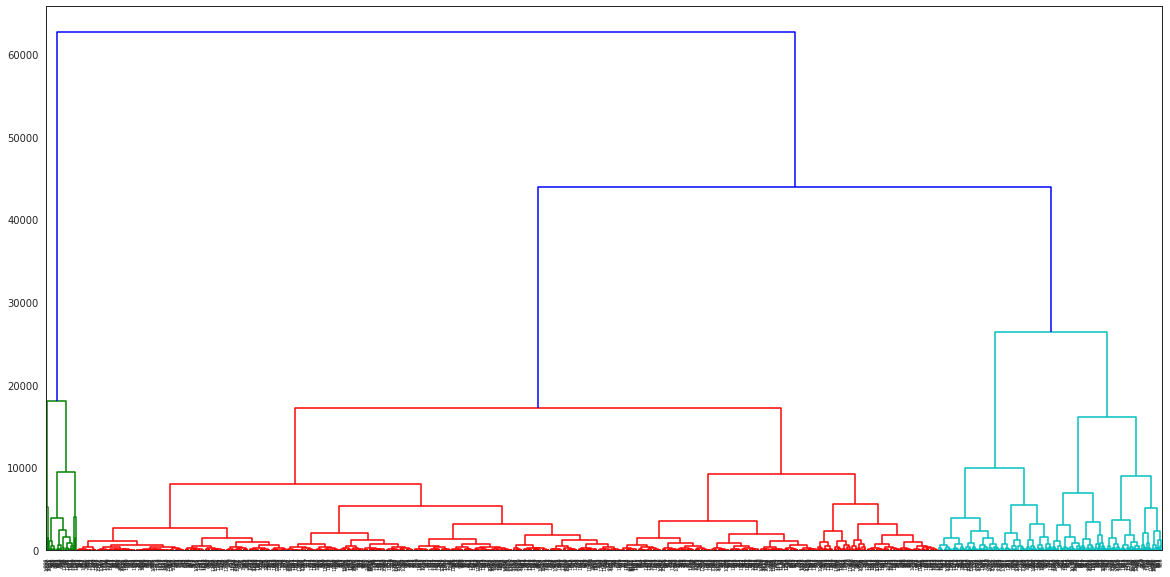

In [ ]:
dendtree(D, 'complete')

[1 0 0 ... 0 0 1]
0.6202861872496285


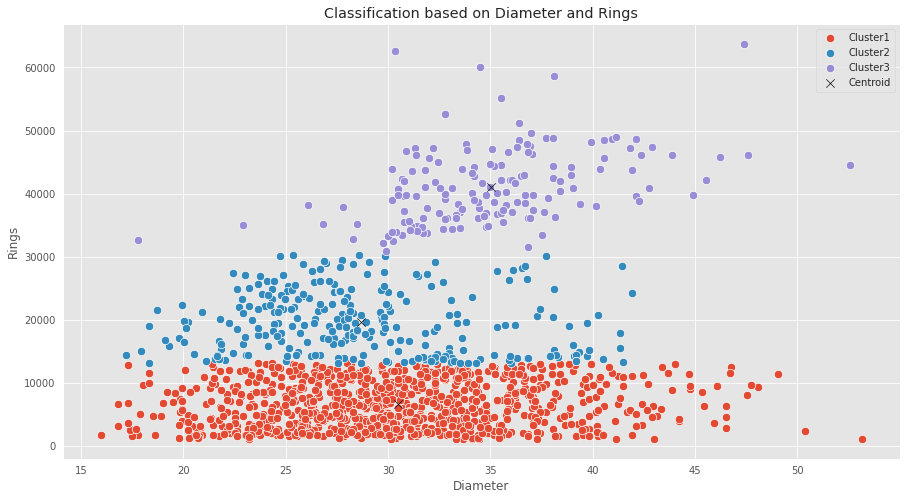

In [ ]:
k = 3
kmeans, y_clusters = KMeanfunc(D, k)
PerSilScore(D, y_clusters)
ClusVisul(D, y_clusters, k, kmeans, 'Classification based on Diameter and Rings', 'Diameter', 'Rings')

### Inference

After observing all the three models we can observe that both average and complete link measure gave the same value for k i.e. 3 and have a score of .62 while the single link measure gave the value of k to be 4 and has the score of .61. So, for our dataset we can conclude that average and complete both are able to train equally good models for classification.